# Dia 1
Revisando em 28-29/Março/2021

Nota: me permitirei fazer comentários desde descritivos, até sobre tentativas e comentários sobre o conteúdo, além de dar uma especial atenção a como planejaram ensinar a linguagem usando o tema (que deve manter-se como ferramenta para o trabalho real).

Vou considerar usar a base de dados completa localmente (em meu computador) para fazer as análises.

## 1. Introduzindo Google Colab e sintaxe de Python/Pandas


Uma breve introdução à estrutura de python seria bem vinda aqui, pois se não me engano me confundi um pouco nesta parte por ter estudado uma linguagem como C antes.

Após um pouco de contextualização (seria interessante dar informação/exemplo adicional para fornecer mais contexto, ao invés de se manter em "vc faz isso aqui, e agora olha aquilo ali" que um livro faria muito melhor).

In [ ]:
# Associação de variável 
  # (python detecta automaticamente o tipo de dado e associa à variável)
 teste = "palavra"

In [ ]:
# "Impressão" de informação para o usuário
print(teste)

palavra


## 2. Preparando o ambiente

Aqui teria sido interessante fazer uma análise de uma base com um número de __colunas__ bem menor, usando até mesmo uma planilha com os dados para visualizar melhor, ao invés de uma tabela com o cabeçalho gigantesco produzido pela própria plataforma do Colab.

Uma das coisas mais importantes que aprendi em "A Taste of SQL", um seminário da CS50x, foi que conhecer seus dados e como a base está estruturada é uma das coisas mais importantes, pois é isso que entra no nosso caminho quando já sabemos como usar a linguagem, e é isto o que verdadeiramente é o trabalho real de uma análise.

In [2]:
# Importar uma biblioteca que tenha funções para usar na análise de banco de dados
  # Pensei ser estranho importarem a biblioteca como "pd", e para testar se fazia alguma diferença importei como "panda"
  # Pelo visto isto não foi muito interessante para ajudar na hora de um usuário inexperiente aprender do zero.
  # (Sei que ele usou "dataframe" mas estou me permitindo importar um pouco do pouco que sei de SQL.)
import pandas as panda

In [3]:
# Adicionar a base de dados (amostra dos dados completos do ENEM 2019) como uma variável.
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Usar a função de ler arquivos csv da biblioteca panda e entregá-la à variável "dados".
dados = panda.read_csv(fonte)

# É interessante apontar que simplesmente ter colocado o link com aspas na função sem associar a variável "fonte" seria a mesma coisa

In [ ]:
# Como ver se os dados foram importados corretamente?
# Podemos usar uma função da biblioteca pandas para apenas mostrar um "cabeçalho" (head) com algumas linhas para sabermos mais sobre a base.
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


## 3. Explorando os dados

In [ ]:
# Solicitando (ou lendo) mais de um dado para uma função (ou comando, ou programa, ou seja lá como preferir chamar)
# Quando mais de uma coluna for requerida, é preciso fornecer uma **lista** com os itens,
# e para criar uma usamos colchetes.
dados[["SG_UF_RESIDENCIA","Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [ ]:
# Sintaxe de python/pandas: após acessada uma ou mais colunas desejadas,
# pode-se adicionar código a frente do ja existente para fornecer as informações extraidas auma outra função.
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [ ]:
# Por alguma razão foi usado uma estrutura familiar para mim: passar argumento para função
# Não sei a razão da mudança, já que a intuição da instrução anterior seria usar dados["coluna"].unique().len()
len(dados["SG_UF_RESIDENCIA"].unique())

27

Nota: Posso presumir com relativa segurança (apenas agora, após o contato com Pyton e SQL) que a função len() seria algo de Python e talvez o uso da adição de .unique() deva ter algo a ver com a biblioteca panda. Mas novamente, não é interessante dar essas mensagens conflitantes, especialmente quando se diz que "não precisa de histórico de programação" (já que eu que não tive contato com python tive problemas).

Claro, se a razão for muito técnica seria justificável a omissão, porém neste cenário o melhor seria evitar tais casos por completo.

Além do mais, o uso de termos como "plotou" sem nenhum tipo de explicação também não ajuda muito.

In [ ]:
# Buscando saber mais sobre a idade de quem fez o ENEM
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
# É interessante ordenar a saída não pela quantidade (padrão) mas pelas idades
# Isso ajuda a ver qual é a menor das idades, e qual é a maior,
# mas ainda não nos permite vizualisar tão bem essas informações de proporção... 
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
# Gráficos são excelentes para entendermos os dados, mas as porcentagens também servem:
# Desafio 1: Descobrir a porcentagem de cada idade dos que fizeram o Enem em comparação com o total de inscritos.
# Desafio 2: De quais estados são os 4 alunos de 13 anos que se inscreveram no Enem?

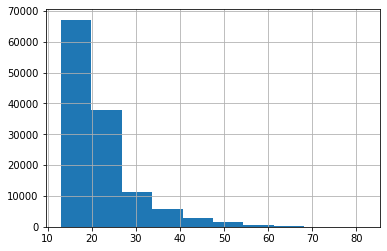

In [ ]:
# Produzindo um histograma a partir dos dados de idade dos alunos (em relação ao total de células)
# Percebemos que o número de barras é menor que a quantidade de idades diferentes que existem, e portanto há aproximação.
dados["NU_IDADE"].hist()

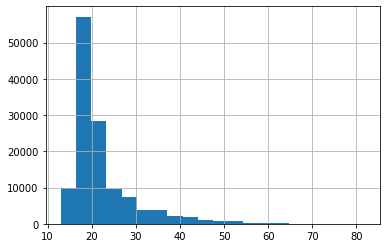

In [ ]:
# É possível editar um parâmetro da função hist() para ajustar o número de barras do gráfico.
dados["NU_IDADE"].hist(bins = 20)

In [ ]:
# Para determinar a quantidade de idades diferentes para configurarmos o histograma apropriadamente.
len(dados["NU_IDADE"].unique())
# ou
len(dados["NU_IDADE"].value_counts())


65

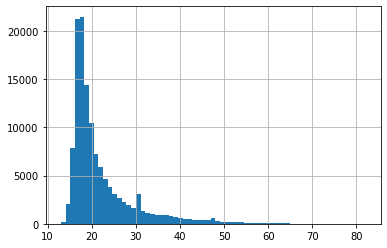

In [ ]:
# Fornecendo a quantidade apropriada de diferentes idades conseguimos um gráfico mais representativo.
dados["NU_IDADE"].hist(bins = 65)

Nota: Acho que seria muito interessante adicionar uma análise como esta: a de averiguar que número de barras seria adequado utilizar, e chegar a conclusao de que o valor "discreto" da quantidade de idades. Isto levaria a uma busca por como determinar o valor 65 que cheguei anteriormente, e produziria um resultado agradável.

In [ ]:
# Desafio 3: Adicionar título no gráfico (me parece meio inútil)

In [ ]:
# Pesquisando (querying) nos dados baseado em uma condição (ser treineiro)
# Note que a condição dentro de parêntese é um argumento da função .query(),
# e que se usa os colchetes depois para selecionar apenas a coluna de treineiro dentre todas as outras.
# (ou seja, o dados.query() retornou uma tabela completa apenas com itens que supriram a condição, mas não teria separado nenhuma coluna)
dados.query("IN_TREINEIRO == 1")["IN_TREINEIRO"]

0         1
4         1
12        1
14        1
16        1
         ..
127328    1
127340    1
127349    1
127350    1
127352    1
Name: IN_TREINEIRO, Length: 15401, dtype: int64

In [ ]:
# Ordenando os resultados baseado na idade (para descobrir se a maioria do pessoal mais novo é treineiro)
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

In [ ]:
# Desafio 4 (Interessantísismo!): Fazer dois histogramas que comparem a quantidade de pessoas que fizeram a prova
# como treineiros e como não treineiros.

Nota: De fato eu não gosto muito da abordagem de "vai descobrir como fazer isso" para um curso rápido, sem ter cuidadosamente avaliado se todas as ferramentas foram dados ao aluno, mas achei esse desafio especialmente importante. Vou avaliar este aspecto depois de revisar ou refazer os desafios.

Não me lembro de ter achado a documentação de  pandas especialmente excepcional para aprender, mesmo que seja bem feita. Manuais têm o erro frequente (ou o propósito) de serem estruturados para consulta específica, não para acompanhar e guiar alguém que esteja a aprender.

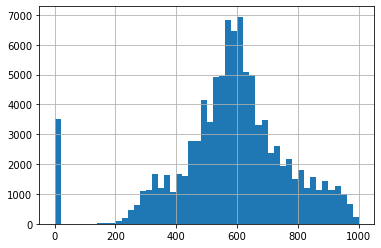

In [ ]:
# Analisando o gráfico da distribuição de notas
dados["NU_NOTA_REDACAO"].hist(bins=50)

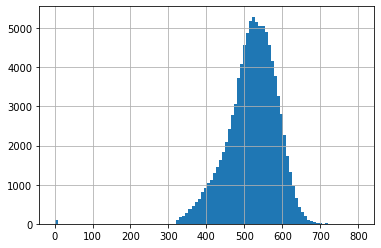

In [ ]:
# Dando uma olhada na distribuição de notas em Linguagens e códigos.
# Note que não é tão simples de tirar zero como em redação, então não há  amesma anormalidade na curva como anteriormente.
dados["NU_NOTA_LC"].hist(bins=100)

In [ ]:
# Podemos tirar a média de todas as células de uma coluna
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

In [ ]:
# Também é possivel calcular o desvio padrão da coluna
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [5]:
# É possível realizar várias análises do tipo das duas anteriores apenas com a função .describe()
provas = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_LC"]
dados[provas].describe()

# Note que também seria possível colocar o grupo dentro dos colchetes sem usar a variável
# dados[["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_LC"]].describe()
# Talvez ter repetido que isto é possível, mas que por ser usado mais vezes no futuro estaria em uma variável seria mais didático.

,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_LC
count,98043.000000,92758.000000,92758.000000,98043.000000,98043.000000
mean,507.365912,477.964015,523.555206,571.570025,520.463928
std,82.972839,76.296099,109.416939,188.076455,64.556578
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,447.900000,418.000000,435.300000,480.000000,483.700000
50%,510.900000,470.200000,501.600000,580.000000,526.100000
75%,567.100000,533.300000,598.200000,680.000000,565.100000
max,809.400000,797.300000,985.000000,1000.000000,801.700000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


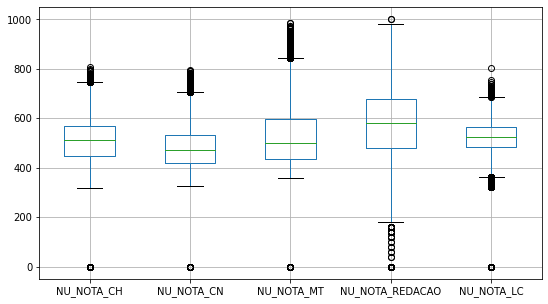

In [ ]:
# Em comparações, a utilização de "boxplots" pode ser bem útil
dados[provas].plot.box(grid = True, figsize = (9,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc20f3fe850>]],
      dtype=object)

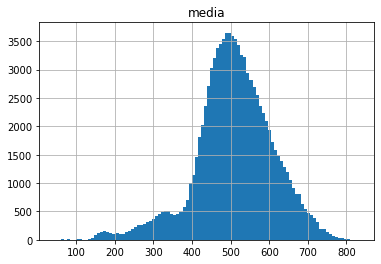

In [ ]:
# Tentando calcular a média das cinco notas de cada aluno para ver gráfico
# e retirar os alunos que tiraram zero para visualizar melhor

# media = ("NU_NOTA_CH"+"NU_NOTA_CN"+"NU_NOTA_MT"+"NU_NOTA_REDACAO"+"NU_NOTA_LC")/5 #não dá, sintaxe errada
# dados[provas].mean() #calcula a média de cada coluna
# sum(dados[provas]) #soma todos os valores por coluna

medias = dados[provas].sum(axis=1).div(5)
# sum() com o parâmetro faz os valores das células nas linhas serem somados
# div() divide os valores das células da coluna pelo valor fornecido

# Tentando usar query para remover os que zeraram
# medias.query("coluna != 0") #não sei o nome da coluna pois não parece ter
# medias.columns = ['media'] #não funciona
# class(medias) #tentando descobrir o que virou (senão dataframe, que .query() reclamou não ser)
# type(medias) #funcionou! descobri que isto não é um dataframe, mas sim "series"

medias.to_frame(name = 'media').query("media != 0").hist(bins = 100)
# .query() só funciona em dataframes, e nesse caso acabei produzindo apenas uma "series"

In [ ]:
# Desafio 5: Comparar as notas daqueles que escolheram inglês e espanhol.
# Desafio 6: Produzir uma vizualisação nova com pandas ou a bibliotecxa matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6da037fc50>]],
      dtype=object)

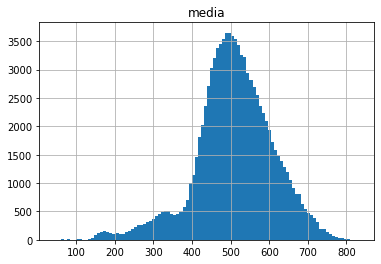

In [6]:
# Seria possível colocar tudo em um comando? Sim! 
# (o fato de ter visto a possibilidade de trocar nome da coluna sem estar dentro de parêntesis me fizera ter a dúvida)
dados[provas].sum(axis=1).div(5).to_frame(name = 'media').query("media != 0").hist(bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6da01de750>,
      dtype=object)

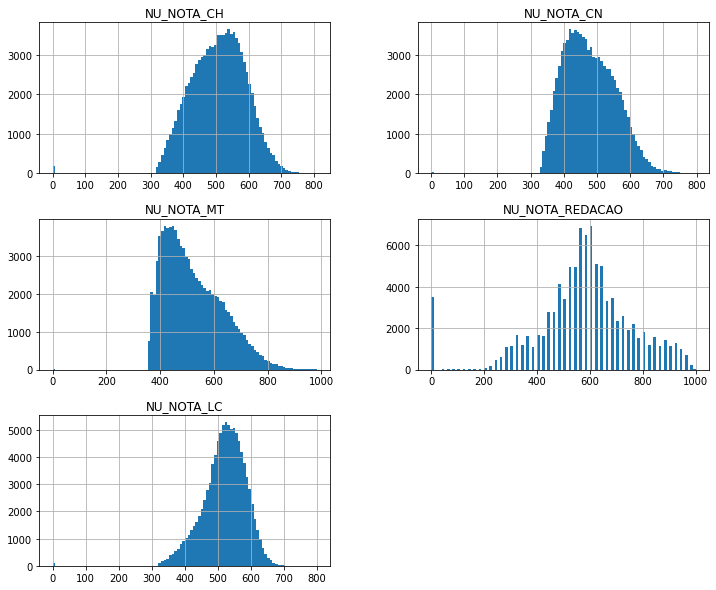

In [7]:
# Vendo os histogramas das provas
# dados[provas].hist() # muito pequeno
dados[provas].hist(bins = 100, figsize = (12, 10))